In [ ]:
# import numpy as np

# properties = np.zeros(401)
# for i in range (500) :
#     with open(f'/content/drive/MyDrive/femcode11(DL_executed)-20240513T044442Z-001/femcode(DL_executed)/cont_ver2/prop{i}.dat', 'r') as prop:
#         prop1 = prop.read()
#     prop_s = prop1.split()
#     prop_a = np.array(prop_s)

#     prop_n= np.delete(prop_a,0)
#     prop_n = np.delete(prop_n,0)
#     for j in range (13) :
#         prop_n = np.delete(prop_n,-1)

#     prop2 = np.array([])
#     for i in range (401) :
#         prop2 = np.append(prop2,float(prop_a[i]))

#     properties = np.vstack((properties,prop2))

# Properties = np.delete(properties,0,0)

# Properties = Properties.reshape(500,401,1)
# print(Properties.shape)




import numpy as np

properties = np.zeros(401)
for file_index in range(500):
    with open(f'/content/drive/MyDrive/femcode11(DL_executed)-20240513T044442Z-001/femcode(DL_executed)/cont_ver2/prop{file_index}.dat', 'r') as prop_file:
        prop_data = prop_file.read()
    prop_values = np.array(prop_data.split())
    prop_values = np.delete(prop_values, [0, 1])  # Removing first two elements
    prop_values = np.delete(prop_values, range(-1, -14, -1))  # Removing last 13 elements

    # Convert remaining values to float and append to prop2
    prop2 = np.array([])
    for value in prop_values:
        prop2 = np.append(prop2, float(value))

    properties = np.vstack((properties, prop2))

Properties = np.delete(properties, 0, axis=0)
Properties = Properties.reshape(500, 401, 1)
print(Properties.shape)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 401 and the array at index 1 has size 346

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
displacement = np.zeros(1681)
for i in range(500):
    with open(f'/content/drive/MyDrive/disp/displacement{i}', 'r') as disp_file:
        disp_content = disp_file.read()
    disp_split = disp_content.split()
    disp_arr = np.array(disp_split)

    # Removing unwanted elements
    disp_arr = np.delete(disp_arr, 0)
    disp_arr = np.delete(disp_arr, 0)
    for j in range(13):
        disp_arr = np.delete(disp_arr, -1)

    disp_data = np.array([])
    for i in range(1681):
        disp_data = np.append(disp_data, float(disp_arr[i]))

    displacement = np.vstack((displacement, disp_data))

Displacement = np.delete(displacement, 0, 0)

Displacement = Displacement.reshape(500, 1681, 1)
print(Displacement.shape)


(500, 1681, 1)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and reshape properties data
properties = np.zeros(401)
for i in range(500):
    with open(f'/content/drive/MyDrive/prop/prop{i}.dat', 'r') as prop:
        prop1 = prop.read()
    prop_s = prop1.split()
    prop_a = np.array(prop_s)

    prop_n = np.delete(prop_a, 0)
    prop_n = np.delete(prop_n, 0)
    for j in range(13):
        prop_n = np.delete(prop_n, -1)

    prop2 = np.array([])
    for i in range(401):
        prop2 = np.append(prop2, float(prop_a[i]))

    properties = np.vstack((properties, prop2))

Properties = np.delete(properties, 0, 0)
Properties = Properties.reshape(500, 401, 1)

# Load and reshape displacement data
displacement = np.zeros(1681)
for i in range(500):
    with open(f'/content/drive/MyDrive/disp/displacement{i}', 'r') as disp:
        disp1 = disp.read()
    disp_s = disp1.split()
    disp_a = np.array(disp_s)

    disp_n = np.delete(disp_a, 0)
    for j in range(1681):
        disp_n = np.delete(disp_n, -1)

    disp2 = np.array([])
    for i in range(1681):
        disp2 = np.append(disp2, float(disp_a[i]))

    displacement = np.vstack((displacement, disp2))

Displacement = np.delete(displacement, 0, 0)
Displacement = Displacement.reshape(500, 1681, 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Properties, Displacement, test_size=0.2, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv1D(200, kernel_size=3, activation='relu', input_shape=(401, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(200, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(1681, activation='relu'),
    layers.Reshape((1681,1))  # Output layer reshaped to match the displacement vector
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
#print("Loss:", loss)
print("Accuracy:", accuracy)


KeyboardInterrupt: 

Epoch 1/10
13/13 [==============================] - 14s 1s/step - loss: 14851.7363 - accuracy: 0.0553 - val_loss: 1344006782976.0000 - val_accuracy: 0.0553
Epoch 2/10
13/13 [==============================] - 14s 1s/step - loss: 14851.7363 - accuracy: 0.0553 - val_loss: 1344007700480.0000 - val_accuracy: 0.0553
Epoch 3/10
13/13 [==============================] - 14s 1s/step - loss: 14851.7363 - accuracy: 0.0553 - val_loss: 1344005079040.0000 - val_accuracy: 0.0553
Epoch 4/10
13/13 [==============================] - 15s 1s/step - loss: 14851.7363 - accuracy: 0.0553 - val_loss: 1344005472256.0000 - val_accuracy: 0.0553
Epoch 5/10
13/13 [==============================] - 15s 1s/step - loss: 14851.7363 - accuracy: 0.0553 - val_loss: 1344005472256.0000 - val_accuracy: 0.0553
Epoch 6/10
13/13 [==============================] - 15s 1s/step - loss: 14851.7363 - accuracy: 0.0553 - val_loss: 1344005472256.0000 - val_accuracy: 0.0553
Epoch 7/10
13/13 [==============================] - 15s 1s/step 

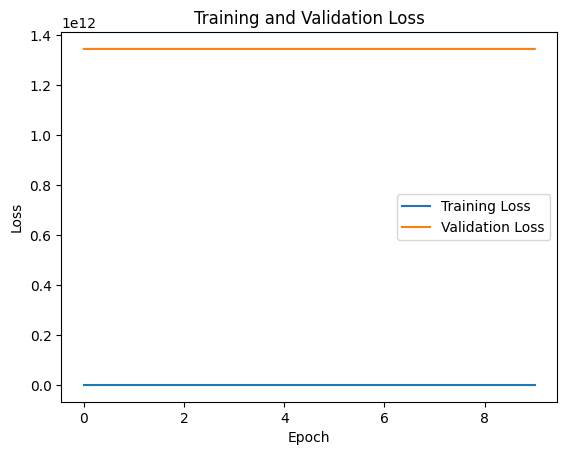

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
